In [50]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("C:\\Users\AEMet\Desktop\st_projets\enm_udra-main\meteorological_models\\distan_lat42.39707lon-8.69362p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [54]:
import pandas as pd
station = pd.read_csv("C:\\Users\\AEMet\\Desktop\\st_projets\\enm_udra-main\\meteorological_stations\\marin.csv",
                      parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")

#drop duplicate index
station = station[~station.index.duplicated()]

#resample prec accumulated hour before and forward
station["prec_1hour_b"] = station.resample("H",label="right",closed="right").sum()
station["prec_1hour_f"] = station["prec"].resample("H",label="left",closed="right").sum()

print(station.head(25))

print("\nObserved labeled variable results")
obv_r = pd.concat([station["prec_1hour_b"].value_counts().rename("Total"),
           station["prec_1hour_b"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)
obv_r.head(15)

                     prec  prec_1hour_b  prec_1hour_f
time                                                 
2021-03-11 00:10:00   0.0           NaN           NaN
2021-03-11 00:20:00   0.1           NaN           NaN
2021-03-11 00:30:00   0.0           NaN           NaN
2021-03-11 00:40:00   0.0           NaN           NaN
2021-03-11 00:50:00   0.1           NaN           NaN
2021-03-11 01:00:00   0.1           0.3           1.8
2021-03-11 01:10:00   0.2           NaN           NaN
2021-03-11 01:20:00   0.1           NaN           NaN
2021-03-11 01:30:00   0.4           NaN           NaN
2021-03-11 01:40:00   0.3           NaN           NaN
2021-03-11 01:50:00   0.4           NaN           NaN
2021-03-11 02:00:00   0.4           1.8           0.1
2021-03-11 02:10:00   0.1           NaN           NaN
2021-03-11 02:20:00   0.0           NaN           NaN
2021-03-11 02:30:00   0.0           NaN           NaN
2021-03-11 02:40:00   0.0           NaN           NaN
2021-03-11 02:50:00   0.0   

,Total,Percentage
0.0,7439,89.8%
0.1,168,2.0%
0.2,89,1.1%
0.3,63,0.8%
0.4,56,0.7%
0.5,54,0.7%
0.6,28,0.3%
0.7,27,0.3%
1.0,16,0.2%
1.3,14,0.2%


**Precipitation hour before**

In [55]:
#prec to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,0.1), (0.1, 400)])
labels=['no precipitación', 'precipitación']

#drop precipitation evert 10 minutes and drop nan
station = station.drop(columns=["prec"]).dropna()

station["prec_lb"]=pd.cut(station["prec_1hour_b"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

pd.concat([station["prec_lb"].value_counts().rename("Total"),
           station["prec_lb"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)

,Total,Percentage
no precipitación,7607,91.8%
precipitación,681,8.2%


Forecast D2

In [56]:
#ria forecast d2
ria_model4k=pd.read_csv("C:\\Users\AEMet\Desktop\st_projets\enm_udra-main\meteorological_models\\lat42.39707lon-8.69362p4R4KmD2.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,214.545364,0.0,1166.868286,3.140418,4.824757,102560.140625,281.254181,0.952518,24049.062500,0.164406,...,51.520000,-1.374254,0.0,0.194357,0.0,0.194357,5580.275879,1518.526978,250.875244,273.314484
2021-03-13 01:00:00,225.678787,0.0,1128.045166,4.475591,6.153662,102533.843750,281.739441,0.926475,24042.150391,5.010872,...,55.029999,-2.741293,0.0,0.533955,0.0,0.533955,5574.872070,1515.244019,251.213806,272.804291
2021-03-13 02:00:00,239.999359,0.0,1116.512085,5.076742,7.992311,102479.242188,281.989441,0.935685,16835.328125,5.006819,...,67.059998,-2.830637,0.0,0.600000,0.0,0.600000,5568.991211,1513.017944,251.418686,272.579834
2021-03-13 03:00:00,239.184814,0.0,1117.297363,5.250713,8.446166,102396.609375,282.385498,0.914196,24234.072266,13.602778,...,65.680000,-2.403894,0.0,0.152376,0.0,0.152376,5560.987793,1504.526001,251.836380,272.713043
2021-03-13 04:00:00,246.586426,0.0,1163.626709,5.125148,8.151620,102331.562500,282.544067,0.917266,24038.500000,14.297740,...,58.830002,-1.887336,0.0,0.454938,0.0,0.454938,5555.812012,1499.142944,252.413376,272.892181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21 19:00:00,355.647461,0.0,2032.414062,1.049479,3.642752,103183.070312,284.074738,0.992159,24043.919922,-0.246143,...,0.000000,0.000488,0.0,0.000000,0.0,0.000000,5754.759766,1597.805542,258.269867,280.105377
2022-02-21 20:00:00,14.205400,0.0,2068.030029,1.789081,5.230898,103210.468750,283.419312,0.990247,24043.736328,-0.776044,...,0.000000,-0.000238,0.0,0.000000,0.0,0.000000,5761.044922,1600.918213,258.776062,280.371124
2022-02-21 21:00:00,29.933767,0.0,2066.399414,1.791273,3.336884,103265.210938,282.753876,0.977224,24035.980469,0.002071,...,0.000000,0.000262,0.0,0.000000,0.0,0.000000,5766.887207,1605.219849,258.889862,280.220367


In [57]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#join actual data versus meteorological data
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

#show results
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lb
                  Total Porcentaje
no precipitación   7569      91.8%
precipitación       672       8.2%


prec0_l
                  Total Porcentaje
no precipitación   7111      86.3%
precipitación      1130      13.7%


prec1_l
                  Total Porcentaje
no precipitación   7014      85.1%
precipitación      1227      14.9%


prec2_l
                  Total Porcentaje
no precipitación   7014      85.1%
precipitación      1227      14.9%


prec3_l
                  Total Porcentaje
no precipitación   6907      83.8%
precipitación      1334      16.2%




In [58]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.962453  0.904215  0.932425  7569.000000
precipitación      0.358407  0.602679  0.449501   672.000000
accuracy           0.879626  0.879626  0.879626     0.879626
macro avg          0.660430  0.753447  0.690963  8241.000000
weighted avg       0.913197  0.879626  0.893046  8241.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.965783  0.894966  0.929027  7569.000000
precipitación      0.352078  0.642857  0.454976   672.000000
accuracy           0.874408  0.874408  0.874408     0.874408
macro avg          0.658930  0.768912  0.692002  8241.000000
weighted avg       0.915739  0.874408  0.890371  8241.000000


prec2_l
                  precision    recall  f1-score      support
no precipitación   0.964927  0.894174  0.928204  7569.000000
precipitación      0.347188  0.633929  0.448657   672.000000
ac

In [59]:

print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")


Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6844            725  7569
precipitación                  267            405   672
All                           7111           1130  8241
Heidke Skill Score: 0.39


prec1_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6774            795  7569
precipitación                  240            432   672
All                           7014           1227  8241
Heidke Skill Score: 0.39


prec2_l           no precipitación  precipitación   All
prec_lb                                                
no precipitación              6768            801  7569
precipitación                  246            426   672
All                           7014           1227  8241
Heidke Skill Score: 0.38


prec3_l           no precipitación

In [60]:
import math
from scipy.stats import entropy

for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  column_sc = pd.crosstab(df_all4k.prec_lb, df_all4k[l], margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
  print(column_sc)
  print("\n")




prec0_l                no precipitación  precipitación  Climatología
no precipitación               0.962453       0.641593      0.918456
precipitación                  0.037547       0.358407      0.081544
entropia/entropia.max          0.230932       0.941353      0.407595


prec1_l                no precipitación  precipitación  Climatología
no precipitación               0.965783       0.647922      0.918456
precipitación                  0.034217       0.352078      0.081544
entropia/entropia.max          0.215119       0.935910      0.407595


prec2_l                no precipitación  precipitación  Climatología
no precipitación               0.964927       0.652812      0.918456
precipitación                  0.035073       0.347188      0.081544
entropia/entropia.max          0.219226       0.931532      0.407595


prec3_l                no precipitación  precipitación  Climatología
no precipitación               0.968438       0.659670      0.918456
precipitación               

**Precipitation 1 hour forward**

In [61]:
station["prec_lf"]=pd.cut(station["prec_1hour_f"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

pd.concat([station["prec_lf"].value_counts().rename("Total"),
           station["prec_lf"].value_counts(normalize=True).rename("Percentage").map(lambda n: '{:.1%}'.format(n))],axis=1)

,Total,Percentage
no precipitación,7608,91.8%
precipitación,680,8.2%


In [62]:
#label meteorological model prec points 0 , 1, 2 and 3

df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lf","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lf","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

prec_lf
                  Total Porcentaje
no precipitación   7569      91.8%
precipitación       672       8.2%


prec0_l
                  Total Porcentaje
no precipitación   7111      86.3%
precipitación      1130      13.7%


prec1_l
                  Total Porcentaje
no precipitación   7014      85.1%
precipitación      1227      14.9%


prec2_l
                  Total Porcentaje
no precipitación   7014      85.1%
precipitación      1227      14.9%


prec3_l
                  Total Porcentaje
no precipitación   6907      83.8%
precipitación      1334      16.2%




In [63]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k["prec_lf"], df_all4k[l],output_dict=True)).T)
  print("\n")

Informe de calidad desagregado (modelo meteorológico)

prec0_l
                  precision    recall  f1-score      support
no precipitación   0.960203  0.902101  0.930245  7569.000000
precipitación      0.344248  0.578869  0.431743   672.000000
accuracy           0.875743  0.875743  0.875743     0.875743
macro avg          0.652225  0.740485  0.680994  8241.000000
weighted avg       0.909975  0.875743  0.889596  8241.000000


prec1_l
                  precision    recall  f1-score      support
no precipitación   0.963644  0.892985  0.926970  7569.000000
precipitación      0.339853  0.620536  0.439179   672.000000
accuracy           0.870768  0.870768  0.870768     0.870768
macro avg          0.651749  0.756760  0.683074  8241.000000
weighted avg       0.912778  0.870768  0.887194  8241.000000


prec2_l
                  precision    recall  f1-score     support
no precipitación   0.963216  0.892588  0.926558  7569.00000
precipitación      0.337408  0.616071  0.436019   672.00000
accur

In [64]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lf, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")


Matriz de Confusión  (modelo meteorológico)

prec0_l           no precipitación  precipitación   All
prec_lf                                                
no precipitación              6828            741  7569
precipitación                  283            389   672
All                           7111           1130  8241
Heidke Skill Score: 0.37


prec1_l           no precipitación  precipitación   All
prec_lf                                                
no precipitación              6759            810  7569
precipitación                  255            417   672
All                           7014           1227  8241
Heidke Skill Score: 0.37


prec2_l           no precipitación  precipitación   All
prec_lf                                                
no precipitación              6756            813  7569
precipitación                  258            414   672
All                           7014           1227  8241
Heidke Skill Score: 0.37


prec3_l           no precipitación

In [97]:
sklearn.__version__

'0.23.2'

**ML 
Warning: enviroment scikit-learn = 0.23.2**

In [65]:
#drop label meteorological columns and 
m_model = df_all4k.drop(columns = ["prec_1hour_b","prec_1hour_f","prec0_l","prec1_l","prec2_l","prec3_l","prec_lf"])
m_model

,prec_lb,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,no precipitación,214.545364,0.0,1166.868286,3.140418,4.824757,102560.140625,281.254181,0.952518,24049.062500,...,51.520000,-1.374254,0.0,0.194357,0.0,0.194357,5580.275879,1518.526978,250.875244,273.314484
2021-03-13 01:00:00,no precipitación,225.678787,0.0,1128.045166,4.475591,6.153662,102533.843750,281.739441,0.926475,24042.150391,...,55.029999,-2.741293,0.0,0.533955,0.0,0.533955,5574.872070,1515.244019,251.213806,272.804291
2021-03-13 02:00:00,no precipitación,239.999359,0.0,1116.512085,5.076742,7.992311,102479.242188,281.989441,0.935685,16835.328125,...,67.059998,-2.830637,0.0,0.600000,0.0,0.600000,5568.991211,1513.017944,251.418686,272.579834
2021-03-13 03:00:00,no precipitación,239.184814,0.0,1117.297363,5.250713,8.446166,102396.609375,282.385498,0.914196,24234.072266,...,65.680000,-2.403894,0.0,0.152376,0.0,0.152376,5560.987793,1504.526001,251.836380,272.713043
2021-03-13 04:00:00,no precipitación,246.586426,0.0,1163.626709,5.125148,8.151620,102331.562500,282.544067,0.917266,24038.500000,...,58.830002,-1.887336,0.0,0.454938,0.0,0.454938,5555.812012,1499.142944,252.413376,272.892181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 05:00:00,no precipitación,47.638054,0.0,693.243774,1.135314,2.066168,102850.179688,277.612946,0.954545,24056.886719,...,0.000000,0.000047,0.0,0.000000,0.0,0.000000,5524.423828,1530.268799,246.835938,270.071991
2022-02-19 06:00:00,no precipitación,59.314892,0.0,697.355774,1.231569,2.231162,102896.640625,277.478699,0.946213,24061.808594,...,0.000000,-0.000316,0.0,0.000000,0.0,0.000000,5530.025879,1533.343262,246.755249,270.114868
2022-02-19 07:00:00,no precipitación,64.254074,0.0,714.568115,1.510872,2.730811,102950.414062,277.314362,0.932381,24056.154297,...,0.000000,-0.000211,0.0,0.000000,0.0,0.000000,5537.058105,1538.728760,246.877563,270.068451


In [78]:
from pycaret.classification import *
clasf = setup(m_model, target = 'prec_lb',train_size=0.9, feature_selection= True,fix_imbalance=True,
           pca =False, pca_components = 15,normalize=True,remove_multicollinearity=False,
           polynomial_features=False,
           remove_outliers=False)

,Description,Value
0,session_id,2770
1,Target,prec_lb
2,Target Type,Binary
3,Label Encoded,"no precipitación: 0, precipitación: 1"
4,Original Data,"(8241, 101)"
5,Missing Values,False
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
import sklearn
print(sklearn.__version__)

0.23.2


In [79]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9284,0.9386,0.6043,0.5581,0.5789,0.5399,0.5412,1.0620
rf,Random Forest Classifier,0.9183,0.9345,0.6208,0.5028,0.5549,0.5106,0.5144,2.9550
dummy,Dummy Classifier,0.9179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0590
lightgbm,Light Gradient Boosting Machine,0.9157,0.9277,0.5912,0.4875,0.5335,0.4877,0.4909,0.6930
dt,Decision Tree Classifier,0.8809,0.7124,0.5108,0.3469,0.4125,0.3490,0.3575,0.6580
gbc,Gradient Boosting Classifier,0.8755,0.9088,0.7059,0.3671,0.4824,0.4197,0.4492,8.8260
knn,K Neighbors Classifier,0.8556,0.8853,0.8276,0.3445,0.4860,0.4184,0.4732,1.0110
ada,Ada Boost Classifier,0.8552,0.8884,0.7011,0.3247,0.4436,0.3731,0.4099,1.8520
qda,Quadratic Discriminant Analysis,0.8424,0.8726,0.7470,0.3107,0.4387,0.3649,0.4126,0.1640
nb,Naive Bayes,0.8208,0.8560,0.7552,0.2814,0.4098,0.3295,0.3855,0.0750


In [80]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2770, verbose=0,
                     warm_start=False)

In [81]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9380,0.9505,0.7541,0.5974,0.6667,0.6330,0.6382
1,0.9286,0.9376,0.5738,0.5645,0.5691,0.5302,0.5302
2,0.9299,0.9422,0.5738,0.5738,0.5738,0.5356,0.5356
3,0.9299,0.9389,0.5738,0.5738,0.5738,0.5356,0.5356
4,0.9191,0.9111,0.4754,0.5088,0.4915,0.4477,0.4480
5,0.9259,0.9348,0.5738,0.5469,0.5600,0.5196,0.5197
6,0.9271,0.9305,0.6333,0.5429,0.5846,0.5449,0.5469
7,0.9339,0.9550,0.6721,0.5857,0.6260,0.5899,0.5916
8,0.9271,0.9513,0.6721,0.5467,0.6029,0.5633,0.5669


In [82]:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2770, verbose=0,
                     warm_start=False)

In [88]:
tuned_et = tune_model(et, custom_grid = {'n_estimators' : np.arange(100,250,10)},optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9394,0.9528,0.7213,0.6111,0.6617,0.6286,0.6312
1,0.9272,0.9372,0.5738,0.5556,0.5645,0.5248,0.5249
2,0.9313,0.9455,0.6230,0.5758,0.5984,0.5609,0.5614
3,0.9313,0.9411,0.5902,0.5806,0.5854,0.5479,0.5479
4,0.9218,0.9084,0.5082,0.5254,0.5167,0.4742,0.4742
5,0.9299,0.9351,0.6066,0.5692,0.5873,0.5491,0.5494
6,0.9258,0.9282,0.6167,0.5362,0.5736,0.5332,0.5348
7,0.9406,0.9568,0.7049,0.6232,0.6615,0.6291,0.6306
8,0.9285,0.9525,0.6885,0.5526,0.6131,0.5743,0.5785


In [89]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=-1,
                     oob_score=False, random_state=2770, verbose=0,
                     warm_start=False)

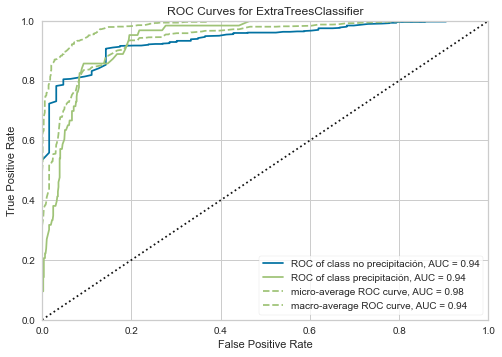

In [90]:
plot_model(tuned_et, plot = 'auc')

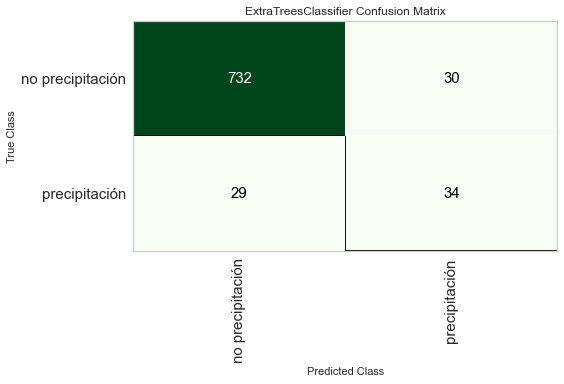

In [91]:
plot_model(tuned_et, plot = 'confusion_matrix')


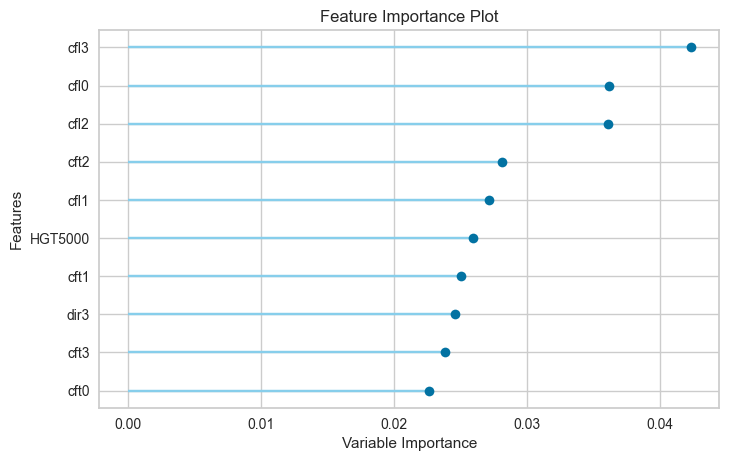

In [93]:
plot_model(tuned_et, plot='feature')

In [94]:
#select x variables
x_var = get_config('X_train').columns
df_all4k[x_var]

,cfh2,wind_gust0,wind_gust2,cfm2,rh2,wind_gust3,cin3,prec0,cfl1,prec1,...,lwflx1,cape1,temp1,temp2,prec3,conv_prec3,lwflx2,shflx0,cfm1,swflx0
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,0.0,4.824757,4.124757,0.0,1.000000,5.524756,-1.374254,0.00,0.000000,0.01,...,272.472168,56.750000,284.781189,278.978180,0.030000,0.0,269.972168,-35.842480,0.0,0.000000
2021-03-13 01:00:00,0.0,6.153662,5.353662,0.0,0.999975,7.953662,-2.741293,0.01,0.473152,0.01,...,274.912048,67.610001,284.670441,279.735443,0.050000,0.0,279.312073,-69.593895,0.0,0.000000
2021-03-13 02:00:00,0.0,7.992311,7.092310,0.0,0.927085,8.792311,-2.830637,0.04,0.600000,0.10,...,280.230835,108.839996,284.537445,282.122437,0.250000,0.0,283.230835,-75.719093,0.0,0.000000
2021-03-13 03:00:00,0.0,8.446166,8.246166,0.0,0.906596,7.746166,-2.403894,0.07,0.022841,0.09,...,278.325806,76.570000,284.777496,282.836487,0.170001,0.0,286.025818,-71.603317,0.0,0.000000
2021-03-13 04:00:00,0.0,8.151620,7.651620,0.0,0.927966,8.551620,-1.887336,0.48,0.529793,0.83,...,348.569397,79.379997,284.663055,282.492065,0.540000,0.0,286.369415,-57.067333,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 05:00:00,0.0,2.066168,2.466168,0.0,0.991745,4.566168,0.000047,0.01,0.003845,0.00,...,258.053040,4.340000,281.364929,276.211945,0.000000,0.0,255.253052,-6.561914,0.0,0.000000
2022-02-19 06:00:00,0.0,2.231162,1.831162,0.0,0.994213,3.931162,-0.000316,0.00,0.000000,0.00,...,263.067719,1.550000,281.068695,275.907684,0.000000,0.0,251.467728,-7.020850,0.0,0.000000
2022-02-19 07:00:00,0.0,2.730811,2.230811,0.0,0.993181,3.130811,-0.000211,0.00,0.000000,0.00,...,254.891159,0.000000,280.863373,275.543365,0.000000,0.0,251.391159,-8.761523,0.0,0.000000


**ML algorithm**

In [99]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
#x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model= ExtraTreesClassifier(n_estimators=170).fit(X_res,y_res)
  #ml_model= LGBMClassifier(n_estimators=170).fit(X_res,y_res)  
  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1076             55  1131
precipitación                   35             71   106
All                           1111            126  1237
Heidke Skill Score: 0.57

Informe de calidad desagregado (Machine Learning)

                  precision    recall  f1-score      support
no precipitación   0.968497  0.951370  0.959857  1131.000000
precipitación      0.563492  0.669811  0.612069   106.000000
accuracy           0.927243  0.927243  0.927243     0.927243
macro avg          0.765994  0.810591  0.785963  1237.000000
weighted avg       0.933792  0.927243  0.930055  1237.000000

Matriz de Confusión  (Machine Learning)

col_0             no precipitación  precipitación   All
prec_lb                                                
no precipitación              1075             61  1136
precipitación            

,HSS
count,10.000000
mean,0.514049
std,0.038298
min,0.454406
25%,0.498288
50%,0.509794
75%,0.539840
max,0.572255


**Cross validation**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
import sklearn

splits = 5
test_size = 0.15

cv = ShuffleSplit(n_splits= splits, test_size=test_size, random_state=100)

cros_val_dict=cross_validate(ml_model, X, Y.values.reshape(1, -1)[0], cv=cv,scoring=["accuracy",'f1_macro',"f1_weighted"]) 

cros_val=pd.DataFrame(cros_val_dict) 

print("meteorological model variables selected:\n",np.array(x_var))

print("\nCross validation:")
print ("\nSplits number:", splits, "\nTest size:",test_size)

print("\nf1_weighted: %0.2f (+/- %0.2f)" % (cros_val_dict['test_f1_weighted'].mean(), cros_val_dict['test_f1_weighted'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cros_val_dict['test_accuracy'].mean(), cros_val_dict['test_accuracy'].std() * 2))

print("\nAI model:",ml_model)

 
print("\nLibrary versions\n")
print('sklearn: {}'. format(sklearn. __version__))
print('pandas: {}'. format(pd. __version__))
print('numpy: {}'. format(np. __version__))

** Extratree **

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()

**Export model**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d1_plus.al", 'wb'))

**Forecast D0**

In [ ]:
#ria forecast d0
ria_model4k=pd.read_csv("C:\\Users\AEMet\Desktop\st_projets\enm_udra-main\meteorological_models\\lat42.39707lon-8.69362p4R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

In [ ]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")


In [ ]:
import math
from scipy.stats import entropy

for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  column_sc = pd.crosstab(df_all4k.prec_lb, df_all4k[l], margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
  print(column_sc)
  print("\n")


**ML algorithm**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res =SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nEstadísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


**Cross validation**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
import sklearn

splits = 5
test_size = 0.15

cv = ShuffleSplit(n_splits= splits, test_size=test_size, random_state=100)

cros_val_dict=cross_validate(ml_model, X, Y.values.reshape(1, -1)[0], cv=cv,scoring=["accuracy",'f1_macro',"f1_weighted"]) 

cros_val=pd.DataFrame(cros_val_dict) 

print("meteorological model variables selected:\n",np.array(x_var))

print("\nCross validation:")
print ("\nSplits number:", splits, "\nTest size:",test_size)

print("\nf1_weighted: %0.2f (+/- %0.2f)" % (cros_val_dict['test_f1_weighted'].mean(), cros_val_dict['test_f1_weighted'].std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cros_val_dict['test_accuracy'].mean(), cros_val_dict['test_accuracy'].std() * 2))

print("\nAI model:",ml_model)

 
print("\nLibrary versions\n")
print('sklearn: {}'. format(sklearn. __version__))
print('pandas: {}'. format(pd. __version__))
print('numpy: {}'. format(np. __version__))

**Export model**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d0_plus.al", 'wb'))

**forecast d2**

In [ ]:
#ria forecast d2
ria_model4k=pd.read_csv("C:\\Users\AEMet\Desktop\st_projets\enm_udra-main\meteorological_models\\lat42.39707lon-8.69362p4R4KmD2.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

In [ ]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")

**ml d2**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nEstadísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()

**Export algorithm d2**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d2_plus.al", 'wb'))

**Forecast D3**


In [ ]:
#ria forecast d3
ria_model4k = pd.read_csv("C:\\Users\AEMet\Desktop\st_projets\enm_udra-main\meteorological_models\\lat42.39707lon-8.69362p4R4KmD3.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model4k

In [ ]:
#label meteorological model prec points 0 , 1, 2 and 3
ria_model4k["prec0_l"]=pd.cut(ria_model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec1_l"]=pd.cut(ria_model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec2_l"]=pd.cut(ria_model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["prec3_l"]=pd.cut(ria_model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()

df_all4k[["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]].sample(20)
for l in ["prec_lb","prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.concat([df_all4k[l].value_counts().rename("Total"),
           df_all4k[l].value_counts(normalize=True).rename("Porcentaje").map(lambda n: '{:.1%}'.format(n))],axis=1))
  print("\n")

In [ ]:
from sklearn.metrics import classification_report

print("Informe de calidad desagregado (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  print(l)
  print(pd.DataFrame(classification_report(df_all4k.prec_lb, df_all4k[l],output_dict=True)).T)
  print("\n")

In [ ]:
print("Matriz de Confusión  (modelo meteorológico)\n")
for l in ["prec0_l","prec1_l","prec2_l","prec3_l"]:
  cm = pd.crosstab(df_all4k.prec_lb, df_all4k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = ria_model4k.columns[:-4].to_list()  

# X and Y
Y=df_all4k.prec_lb
X=df_all4k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nEstadísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()

**Export algorithm d3**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_ENM_d3_plus.al", 'wb'))

**Pycaret issues**

In [ ]:
!pip install pycaret

In [ ]:
!pip install Jinja2


In [ ]:
import Jinja2

In [ ]:
from pycaret.classification import *
clas = setup(df_all4k.drop(columns=["prec0_l","prec1_l","prec2_l","prec3_l"]),target = 'prec_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=False,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

In [ ]:
compare_models(fold=5,sort="F1")

In [ ]:
model=create_model("lightgbm",n_estimators=250,fold=10)

In [ ]:
plot_model(model, plot = 'auc')

In [ ]:
plot_model(model, plot = 'pr')

In [ ]:
plot_model(model,'confusion_matrix')

In [ ]:
plot_model(model,'class_report')

In [ ]:
plot_model(model,"feature")

In [ ]:
plot_model(model,"error")